In [1]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from copy import copy


df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df_S.group_id.unique()

df_GC = pandas.read_csv('../data/Sequoia_GCs.csv')
GCnames = df_GC.ID.unique()
nGCs = size(GCnames)

In [3]:
# Fit data to three component halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)
imod = argmax(Ps,axis=1)
df1 = df.loc[imod==0]
df2 = df.loc[imod==1]
df3 = df.loc[imod==2]

print("Sausage")
print("%.2f ± %.2f" % (meens[0,0],sqrt(covs[0,0,0])))
print("%.2f ± %.2f" % (meens[0,1],sqrt(covs[0,1,1])))
print("%.2f ± %.2f" % (meens[0,2],sqrt(covs[0,2,2])))
print("%.2f ± %.2f" % (meens[0,3],sqrt(covs[0,3,3])))
print(sqrt(covs[0,:,:]*(covs[0,:,:]>.0)))

print("")
print("Halo")
print("%.2f ± %.2f" % (meens[1,0],sqrt(covs[1,0,0])))
print("%.2f ± %.2f" % (meens[1,1],sqrt(covs[1,1,1])))
print("%.2f ± %.2f" % (meens[1,2],sqrt(covs[1,2,2])))
print("%.2f ± %.2f" % (meens[1,3],sqrt(covs[1,3,3])))
print(sqrt(covs[1,:,:]*(covs[1,:,:]>.0)))

print("")
print("Disk")
print("%.2f ± %.2f" % (meens[2,0],sqrt(covs[2,0,0])))
print("%.2f ± %.2f" % (meens[2,1],sqrt(covs[2,1,1])))
print("%.2f ± %.2f" % (meens[2,2],sqrt(covs[2,2,2])))
print("%.2f ± %.2f" % (meens[2,3],sqrt(covs[2,3,3])))
print(sqrt(covs[2,:,:]*(covs[2,:,:]>.0)))


# For copying into latex document

sigrp1 = covs[0,0,1]/sqrt(covs[0,1,1]*covs[0,0,0])
sigrp2 = covs[1,0,1]/sqrt(covs[1,1,1]*covs[1,0,0])
sigrp3 = covs[2,0,1]/sqrt(covs[2,1,1]*covs[2,0,0])

sigrz1 = covs[0,0,2]/sqrt(covs[0,2,2]*covs[0,0,0])
sigrz2 = covs[1,0,2]/sqrt(covs[1,2,2]*covs[1,0,0])
sigrz3 = covs[2,0,2]/sqrt(covs[2,2,2]*covs[2,0,0])

sigpz1 = covs[0,1,2]/sqrt(covs[0,1,1]*covs[0,2,2])
sigpz2 = covs[1,1,2]/sqrt(covs[1,1,1]*covs[1,2,2])
sigpz3 = covs[2,1,2]/sqrt(covs[2,1,1]*covs[2,2,2])

print(r"$\bar{v}_r[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,0],sqrt(covs[1,0,0]),meens[0,0],sqrt(covs[0,0,0]),meens[2,0],sqrt(covs[2,0,0])))
print(r"$\bar{v}_\phi[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,1],sqrt(covs[1,1,1]),meens[0,1],sqrt(covs[0,1,1]),meens[2,1],sqrt(covs[2,1,1])))
print(r"$\bar{v}_z[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.2f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,2],sqrt(covs[1,2,2]),meens[0,2],sqrt(covs[0,2,2]),meens[2,2],sqrt(covs[2,2,2])))
print(r"$\overline{\rm [Fe/H]}$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,3],sqrt(covs[1,3,3]),meens[0,3],sqrt(covs[0,3,3]),meens[2,3],sqrt(covs[2,3,3])))
print(r"$\Sigma_{r\phi}/\sigma_r\sigma_\phi$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigrp2,sigrp1,sigrp3))
print(r"$\Sigma_{rz}/\sigma_r\sigma_z$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigrz2,sigrz1,sigrz3))
print(r"$\Sigma_{\phi z}/\sigma_\phi\sigma_z$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigpz2,sigpz1,sigpz3))
print(r"$w$ & $%.2f$ & $%.2f$ & $%.2f$ \\"%(ws[1],ws[0],ws[2]))


Sausage
-8.17 ± 158.93
25.72 ± 61.50
0.99 ± 80.86
-1.39 ± 0.23
[[158.93219435  -0.          61.64548014   0.64040085]
 [ -0.          61.50275696  -0.          -0.        ]
 [ 61.64548014  -0.          80.86372608   0.47118515]
 [  0.64040085  -0.           0.47118515   0.23117558]]

Halo
-0.06 ± 144.44
5.97 ± 120.03
8.03 ± 115.67
-1.90 ± 0.40
[[144.4425443   -0.          39.30495413   1.26824421]
 [ -0.         120.03194914  -0.          -0.        ]
 [ 39.30495413  -0.         115.66972818   1.3048099 ]
 [  1.26824421  -0.           1.3048099    0.39917567]]

Disk
12.37 ± 76.75
128.78 ± 50.13
3.57 ± 62.69
-1.67 ± 0.27
[[76.75066402 10.3601968  30.12014983 -0.        ]
 [10.3601968  50.12566998 -0.          1.24266601]
 [30.12014983 -0.         62.69161356  0.14148518]
 [-0.          1.24266601  0.14148518  0.27144353]]
$\bar{v}_r[{\rm km\,s}^{-1}]$ & $-0.1 \pm 144.4$ & $-8.2 \pm 158.9$ & $12.4 \pm 76.8$ \\
$\bar{v}_\phi[{\rm km\,s}^{-1}]$ & $6.0 \pm 120.0$ & $25.7 \pm 61.5$ & $128.8 

In [4]:
#Get actions for shards
JR_S = []
Jphi_S = []
Jz_S = []
E_S = []
for i in range(0,size(names)):
    namei = names[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand_matched = df.loc[around(df.ra,8).isin(Cand.ra)]
    JR_S = append(JR_S,(Cand_matched.JR).values)
    Jphi_S = append(Jphi_S,(Cand_matched.Jphi).values)
    Jz_S = append(Jphi_S,(Cand_matched.Jz).values)
    E = append(E_S,(Cand_matched.E).values)

In [5]:
# r_ax1,e_ax1,dens_ax1 = PointScatter((df.JR).values,(df.E).values)
# r1_ax1,e1_ax1,dens1_ax1 = PointScatter((df1.JR).values,(df1.E).values)
# r2_ax1,e2_ax1,dens2_ax1 = PointScatter((df2.JR).values,(df2.E).values)
# r3_ax1,e3_ax1,dens3_ax1 = PointScatter((df3.JR).values,(df3.E).values)
# print('r')

# p_ax2,e_ax2,dens_ax2 = PointScatter((df.Jphi).values,(df.E).values)
# p1_ax2,e1_ax2,dens1_ax2 = PointScatter((df1.Jphi).values,(df1.E).values)
# p2_ax2,e2_ax2,dens2_ax2 = PointScatter((df2.Jphi).values,(df2.E).values)
# p3_ax2,e3_ax2,dens3_ax2 = PointScatter((df3.Jphi).values,(df3.E).values)
# print('p')

# z_ax3,e_ax3,dens_ax3 = PointScatter((df.Jz).values,(df.E).values)
# z1_ax3,e1_ax3,dens1_ax3 = PointScatter((df1.Jz).values,(df1.E).values)
# z2_ax3,e2_ax3,dens2_ax3 = PointScatter((df2.Jz).values,(df2.E).values)
# z3_ax3,e3_ax3,dens3_ax3 = PointScatter((df3.Jz).values,(df3.E).values)
# print('z')


from sklearn.neighbors.kde import KernelDensity
from sklearn import preprocessing
bw = 0.02

def getkernelde(dfc,bw=0.02):
    JR = log10(dfc.JR.values)
    Jphi = dfc.Jphi.values
    Jz = log10(dfc.Jz.values)
    E = dfc.E.values/1.0e5
    data = array([JR,Jphi,Jz,E]).T
    scale = preprocessing.MinMaxScaler()
    data_s = scale.fit_transform(data)
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data_s)
    L = kde.score_samples(data_s)
    L -= amax(L)
    isort = argsort(L)
    x = JR[isort]
    y = Jphi[isort]
    z = Jz[isort]
    eo = E[isort]
    L = L[isort]
    return x,y,z,eo,L

x,y,z,eo,L = getkernelde(df)
x1,y1,z1,eo1,L1 = getkernelde(df1)
x2,y2,z2,eo2,L2 = getkernelde(df2)
x3,y3,z3,eo3,L3 = getkernelde(df3)

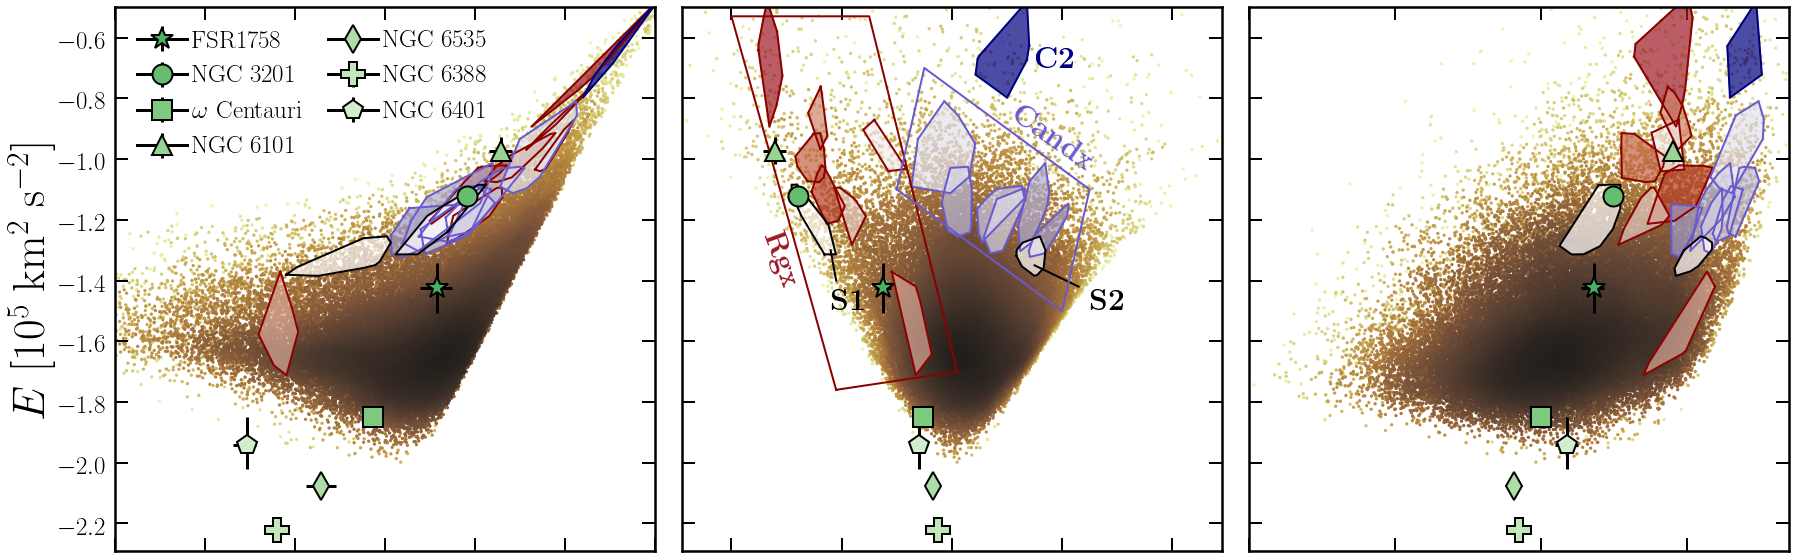

In [6]:
rlab = r'$\log_{10}{(J_R/{\rm [km\,s}^{-1}\,{\rm kpc}])}$'
plab = r'$J_\phi$ [km s$^{-1}$ kpc]'
zlab = r'$\log_{10}{(J_z/{\rm [km\,s}^{-1}\,{\rm kpc}])}$'
Elab = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'

gsize = 50

cmap = cmocean.cm.matter
cmap = copy(plt.get_cmap(cmap))
cmap.set_under('white', 1.0)

Emax = -0.5
Emin = -2.29
jrmin = log10(10.0)
jrmax = log10(10000.0)
jpmin = -4900.0
jpmax = 4900.0
jzmin = log10(1.0)
jzmax = log10(5000.0)

alph = 0.2
cmap2 = cmocean.cm.solar
cmap1 = cmocean.cm.ice
cmap3 = cmocean.cm.speed


fig,ax1,ax2,ax3 = MyTriplePlot(rlab,Elab,plab,'',zlab,'',wspace=0.05,size_y=10,size_x=30)


ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax3.set_ylim([Emin,Emax])

ax1.set_xlim([jrmin,jrmax])
ax2.set_xlim([jpmin,jpmax])
ax3.set_xlim([jzmin,jzmax])

cmap = cmocean.cm.turbid
# ax1.scatter(log10(r_ax1),e_ax1/1.0e5, c=dens_ax1, s=11, edgecolor='',cmap=cmap,label=None,rasterized=True)
# ax2.scatter(p_ax2,e_ax2/1.0e5, c=dens_ax2, s=11, edgecolor='',cmap=cmap,label=None,rasterized=True)
# ax3.scatter(log10(z_ax3),e_ax3/1.0e5, c=dens_ax3, s=11, edgecolor='',cmap=cmap,label=None,rasterized=True)

ax1.scatter(x,eo,c=L,s=11, edgecolor='',cmap=cmap,label=None,rasterized=True)
ax2.scatter(y,eo,c=L,s=11, edgecolor='',cmap=cmap,label=None,rasterized=True)
ax3.scatter(z,eo,c=L,s=11, edgecolor='',cmap=cmap,label=None,rasterized=True)

def PlotShardz(Examples,cols,col_edge):
    n_ex = size(Examples)
    for i in range(0,n_ex):
        shards_color = cols[i,:]

        namei = Examples[i]
        Cand = df_S.loc[df_S['group_id'] == namei]
        Cand_matched = df.loc[around(df.ra,8).isin(Cand.ra)]
        rs = log10(Cand_matched.JR).values
        ps = (Cand_matched.Jphi).values
        zs = log10(Cand_matched.Jz).values
        es = (Cand_matched.E).values/1.0e5

        points = array([rs,es]).T
        hull = ConvexHull(points)
        x_edge = points[hull.vertices,0]
        y_edge = points[hull.vertices,1]
        ax1.fill(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),alpha=0.7,color=shards_color,zorder=2)
        ax1.plot(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),color=col_edge,lw=2,zorder=2)

        points = array([ps,es]).T
        hull = ConvexHull(points)
        x_edge = points[hull.vertices,0]
        y_edge = points[hull.vertices,1]
        ax2.fill(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),alpha=0.7,color=shards_color,zorder=2)
        ax2.plot(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),color=col_edge,lw=2,zorder=2)

        points = array([zs,es]).T
        hull = ConvexHull(points)
        x_edge = points[hull.vertices,0]
        y_edge = points[hull.vertices,1]
        ax3.fill(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),alpha=0.7,color=shards_color,zorder=2)
        ax3.plot(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),color=col_edge,lw=2,zorder=2)
    return _


# Plot some shards
fs = 30

Examples = array(['Rg1','Rg2','Rg3','Rg4','Rg5','Rg6','Rg7'])
cols = flipud(cmocean.cm.amp(linspace(0,0.7,size(Examples))))
PlotShardz(Examples,cols,'Darkred')
ax2.text(-3500.0,-1.3,r'{\bf Rg}\texttt{x}',fontsize=fs,color=cols[0,:],rotation=-70)
#ax2.plot([-4500.0,-1200.0],[-0.75,-1.75],'-',color=cols[0,:],lw=3.5,alpha=0.7)

Examples = array(['Cand8','Cand9','Cand10','Cand11','Cand12','Cand13'])
cols = flipud(cm.Purples(linspace(0.2,0.5,size(Examples))))
PlotShardz(Examples,cols,'slateblue')
ax2.text(1000.0,-0.88,r'{\bf Cand}\texttt{x}',fontsize=fs,color='slateblue',rotation=-35)
#ax2.plot([-300.0,2500.0],[-0.75,-1.05],'-',color=cols[0,:],lw=3.5,alpha=0.7)
#ax2.plot([-300.0,-450.0],[-0.75,-0.8],'-',color=cols[0,:],lw=3.5,alpha=0.7)


Examples = array(['S1'])
cols[0,:] = array([1.0,1.0,1.0,1.0])
PlotShardz(Examples,cols,'k')
ax2.text(-2200.0,-1.5,r'{\bf S1}',fontsize=fs,color='k')
ax2.plot([-2100,-2200],[-1.4,-1.3],'k-',lw=2)     


Examples = array(['S2'])
cols[0,:] = array([1.0,1.0,1.0,1.0])
PlotShardz(Examples,cols,'k')
ax2.text(2500.0,-1.5,r'{\bf S2}',fontsize=fs,color='k')
ax2.plot([2300,1500],[-1.42,-1.35],'k-',lw=2)     


Examples = array(['C2'])
cols[0,:] = array([0.0,0.0,0.5,1.0])
PlotShardz(Examples,cols,'navy')
ax2.text(1500.0,-0.7,r'{\bf C2}',fontsize=fs,color=cols[0,:])




cols = flipud(cm.Greens(linspace(0.2,0.6,nGCs)))
mrkz = array(['*','o','s','^','d','P','p'])
sz = array([18,15,15,15,15,19,15])+5
for i in range(0,nGCs):
    GC_color = cols[i,:]
    namei = GCnames[i]
    Cand = df_GC.loc[df_GC['ID'] == namei]
    x = log10(Cand.JR.values)
    y = Cand.E.values/1.0e5
    yerr = array([[Cand.E_el.values],[Cand.E_eu.values]])/1.0e5
    xerr = log10(array([[Cand.JR.values],[Cand.JR.values]]))-log10(array([[Cand.JR_el.values+Cand.JR.values],[Cand.JR_eu.values+Cand.JR.values]]))
    ax1.errorbar(x, y, yerr=yerr, xerr=xerr,markersize=sz[i],mfc=GC_color,
                     marker=mrkz[i],linewidth=3,markeredgecolor='k',label=Cand.ID[i],color='k',mew=2)  
    
    x = Cand.Jphi.values
    xerr = array([[Cand.Jphi_el.values],[Cand.Jphi_eu.values]])
    ax2.errorbar(x, y, yerr=yerr, xerr=xerr,markersize=sz[i],mfc=GC_color,
                     marker=mrkz[i],linewidth=3,markeredgecolor='k',color='k',mew=2)  
    
    x = log10(Cand.Jz.values)
    xerr = log10(array([[Cand.Jz.values],[Cand.Jz.values]]))-log10(array([[Cand.Jz_el.values+Cand.Jz.values],[Cand.Jz_eu.values+Cand.Jz.values]]))
    ax3.errorbar(x, y, yerr=yerr, xerr=xerr,markersize=sz[i],mfc=GC_color,
                     marker=mrkz[i],linewidth=3,markeredgecolor='k',color='k',mew=2)

    
ax1.legend(frameon=False,ncol=2,loc='upper left',handletextpad=0.2,columnspacing=1.0)
ax2.set_yticklabels([])
ax3.set_yticklabels([])
    

ax2.plot([-2100,100,-1500,-4000,-2100],[-1.76,-1.7,-0.53,-0.53,-1.76],'-',lw=2,color='darkred')
ax2.plot([-1000,2000,2500,-500,-1000],[-1.1,-1.5,-1.1,-0.7,-1.1],'-',lw=2,color='slateblue')

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])

# Save
pltname = 'Actions_decomposed_all'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  

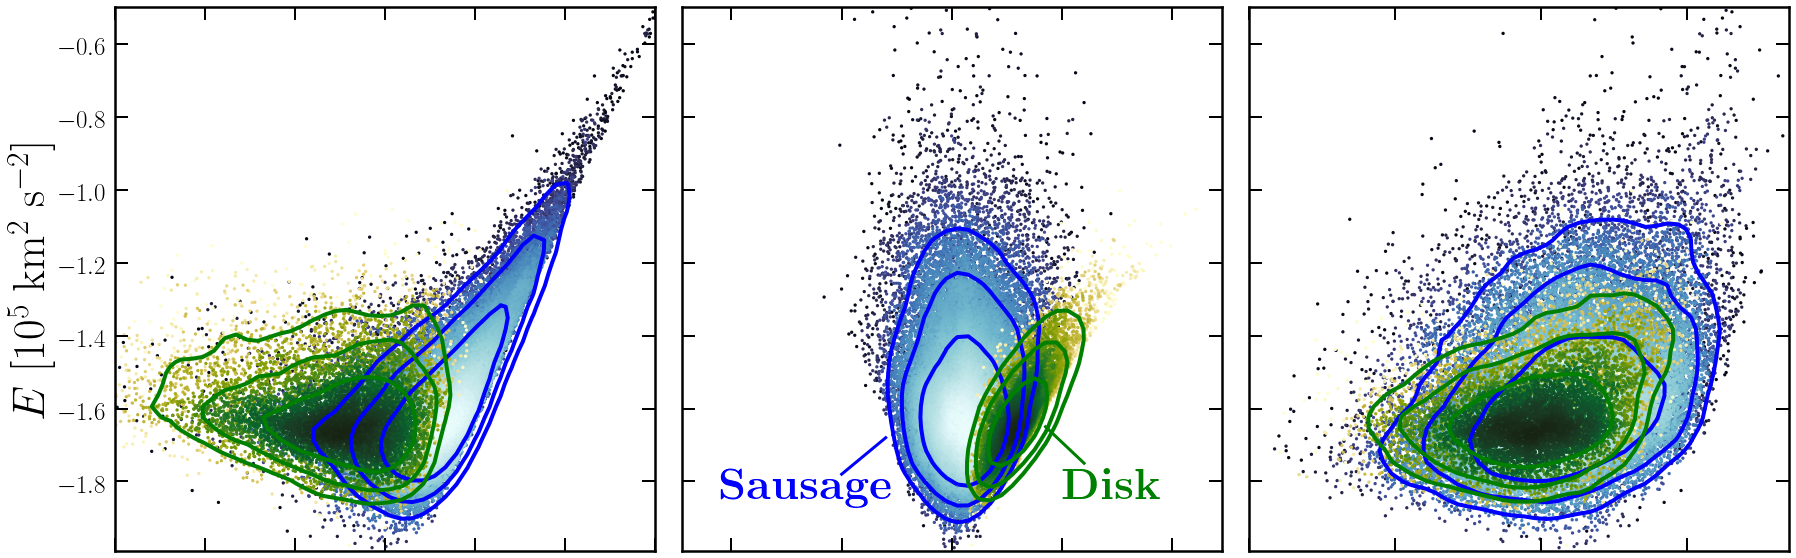

In [7]:
####

from sklearn.neighbors.kde import KernelDensity
def getkernel(xd,yd,xmin,xmax,ymin,ymax,nfine=50,bw=0.02):
    data = array([xd,yd]).T
    data[:,0] = (data[:,0]-xmin)/(xmax-xmin)
    data[:,1] = (data[:,1]-ymin)/(ymax-ymin)
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data)
    xi = linspace(0.0,1.0,nfine)
    yi = linspace(0.0,1.0,nfine)
    X,Y = meshgrid(xi,yi)
    X = reshape(X,nfine**2)
    Y = reshape(Y,nfine**2)
    datai = array([X,Y]).T
    H = kde.score_samples(datai)
    H = reshape(H,(nfine,nfine))
    H -= amax(H)
    xi = xi*(xmax-xmin)+xmin
    yi = yi*(ymax-ymin)+ymin
    return xi,yi,H

#####


Emax = -0.5
Emin = -1.99
alph = 0.8
cline3 = 'Green'
cline1 = 'Blue'

fig,ax1,ax2,ax3 = MyTriplePlot(rlab,Elab,plab,'',zlab,'',wspace=0.05,size_y=10,size_x=30)

ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax3.set_ylim([Emin,Emax])

ax1.set_xlim([jrmin,jrmax])
ax2.set_xlim([jpmin,jpmax])
ax3.set_xlim([jzmin,jzmax])

# ax1.scatter(log10(r_ax1),e_ax1/1.0e5, c=dens_ax1, s=11, edgecolor='',cmap=cmocean.cm.matter,label=None,rasterized=True)
# ax2.scatter(p_ax2,e_ax2/1.0e5, c=dens_ax2, s=11, edgecolor='',cmap=cmocean.cm.matter,label=None,rasterized=True)
# ax3.scatter(log10(z_ax3),e_ax3/1.0e5, c=dens_ax3, s=11, edgecolor='',cmap=cmocean.cm.matter,label=None,rasterized=True)

# ax1.scatter(log10(r1_ax1),e1_ax1/1.0e5, c=dens1_ax1, s=11, edgecolor='',cmap=cmap1,label=None,rasterized=True,alpha=alph)
# ax1.scatter(log10(r3_ax1),e3_ax1/1.0e5, c=dens3_ax1, s=11, edgecolor='',cmap=cmap3,label=None,rasterized=True,alpha=alph)

# ax2.scatter((p1_ax2),e1_ax2/1.0e5, c=dens1_ax2, s=11, edgecolor='',cmap=cmap1,label=None,rasterized=True,alpha=alph)
# ax2.scatter((p3_ax2),e3_ax2/1.0e5, c=dens3_ax2, s=11, edgecolor='',cmap=cmap3,label=None,rasterized=True,alpha=alph)

# ax3.scatter(log10(z1_ax3),e1_ax3/1.0e5, c=dens1_ax3, s=11, edgecolor='',cmap=cmap1,label=None,rasterized=True,alpha=alph)
# ax3.scatter(log10(z3_ax3),e3_ax3/1.0e5, c=dens3_ax3, s=11, edgecolor='',cmap=cmap3,label=None,rasterized=True,alpha=alph)

ax1.scatter(x1,eo1,c=L1,s=11, edgecolor='',cmap=cmap1,label=None,rasterized=True)
ax2.scatter(y1,eo1,c=L1,s=11, edgecolor='',cmap=cmap1,label=None,rasterized=True)
ax3.scatter(z1,eo1,c=L1,s=11, edgecolor='',cmap=cmap1,label=None,rasterized=True)

ax1.scatter(x3,eo3,c=L3,s=11, edgecolor='',cmap=cmap3,label=None,rasterized=True)
ax2.scatter(y3,eo3,c=L3,s=11, edgecolor='',cmap=cmap3,label=None,rasterized=True)
ax3.scatter(z3,eo3,c=L3,s=11, edgecolor='',cmap=cmap3,label=None,rasterized=True)


ax2.set_yticklabels([])
ax3.set_yticklabels([])
  
ax2.text(-4200,-1.85,r'{\bf Sausage}',fontsize=45,color=cline1)
ax2.text(2000,-1.85,r'{\bf Disk}',fontsize=45,color=cline3)
ax2.plot([-2000,-1200],[-1.78,-1.68],'-',color=cline1,lw=3)
ax2.plot([2400,1700],[-1.75,-1.65],'-',color=cline3,lw=3)


nbins = 50
levels = [-3,-2,-1,0]

xi,yi,H = getkernel(log10(df1.JR.values),df1.E.values/1.0e5,jrmin,jrmax,Emin,Emax)
ax1.contour(xi,yi,H,levels=levels,linewidths=4,colors=cline1,linestyles='-')
xi,yi,H = getkernel(df1.Jphi.values,df1.E.values/1.0e5,jpmin,jpmax,Emin,Emax)
ax2.contour(xi,yi,H,levels=levels,linewidths=4,colors=cline1,linestyles='-')
xi,yi,H = getkernel(log10(df1.Jz.values),df1.E.values/1.0e5,jzmin,jzmax,Emin,Emax)
ax3.contour(xi,yi,H,levels=levels,linewidths=4,colors=cline1,linestyles='-')
 
xi,yi,H = getkernel(log10(df3.JR.values),df3.E.values/1.0e5,jrmin,jrmax,Emin,Emax)
ax1.contour(xi,yi,H,levels=levels,linewidths=4,colors=cline3,linestyles='-')
xi,yi,H = getkernel(df3.Jphi.values,df3.E.values/1.0e5,jpmin,jpmax,Emin,Emax)
ax2.contour(xi,yi,H,levels=levels,linewidths=4,colors=cline3,linestyles='-')
xi,yi,H = getkernel(log10(df3.Jz.values),df3.E.values/1.0e5,jzmin,jzmax,Emin,Emax)
ax3.contour(xi,yi,H,levels=levels,linewidths=4,colors=cline3,linestyles='-')


ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])

# Save
pltname = 'Actions_decomposed_sausage'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  

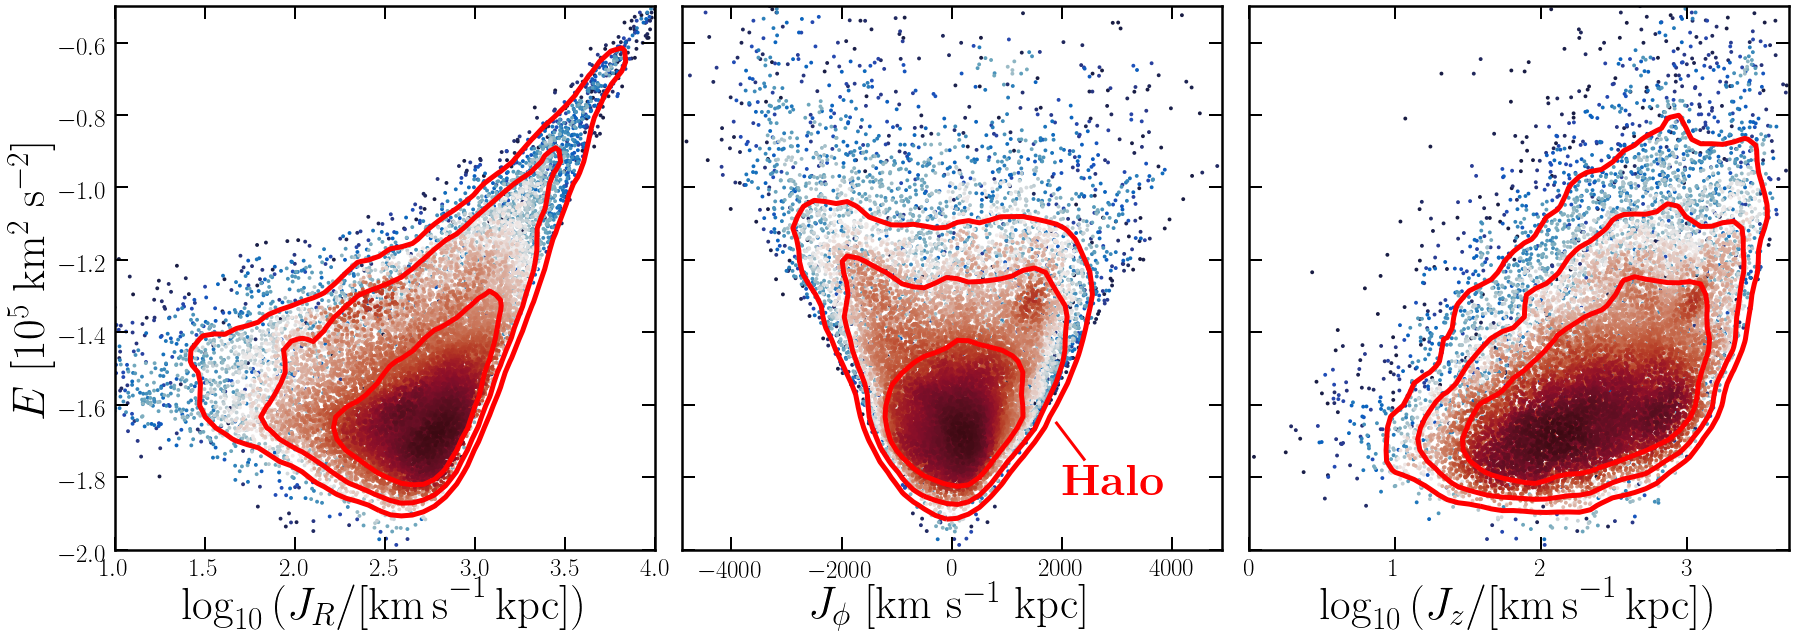

In [12]:
Emax = -0.5
Emin = -2.0
alpha = 1.0
cline2 = 'red'
msz = 15
nbins = 50
levels = [-3,-2,-1,0]

fig,ax1,ax2,ax3 = MyTriplePlot(rlab,Elab,plab,'',zlab,'',wspace=0.05,size_y=10,size_x=30)

ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax3.set_ylim([Emin,Emax])

ax1.set_xlim([jrmin,jrmax])
ax2.set_xlim([jpmin,jpmax])
ax3.set_xlim([jzmin,jzmax])

cmap2 = cmocean.cm.balance

# ax1.scatter(log10(r2_ax1),e2_ax1/1.0e5, c=dens2_ax1, s=msz, edgecolor='',cmap=cmap2,label=None,rasterized=True,alpha=alph)
# ax2.scatter((p2_ax2),e2_ax2/1.0e5, c=dens2_ax2, s=msz, edgecolor='',cmap=cmap2,label=None,rasterized=True,alpha=alph)
# ax3.scatter(log10(z2_ax3),e2_ax3/1.0e5, c=dens2_ax3, s=msz, edgecolor='',cmap=cmap2,label=None,rasterized=True,alpha=alph)

ax1.scatter(x2,eo2,c=L2,s=15, edgecolor='',cmap=cmap2,label=None,rasterized=True)
ax2.scatter(y2,eo2,c=L2,s=15, edgecolor='',cmap=cmap2,label=None,rasterized=True)
ax3.scatter(z2,eo2,c=L2,s=15, edgecolor='',cmap=cmap2,label=None,rasterized=True)


ax2.set_yticklabels([])
ax3.set_yticklabels([])

ax2.text(2000,-1.85,r'{\bf Halo}',fontsize=45,color=cline2)
ax2.plot([2400,1900],[-1.75,-1.65],'-',color=cline2,lw=3)


# contours

xi,yi,H = getkernel(log10(df2.JR.values),df2.E.values/1.0e5,jrmin,jrmax,Emin,Emax)
ax1.contour(xi,yi,H,levels=levels,linewidths=5,colors=cline2,linestyles='-')

xi,yi,H = getkernel(df2.Jphi.values,df2.E.values/1.0e5,jpmin,jpmax,Emin,Emax)
ax2.contour(xi,yi,H,levels=levels,linewidths=5,colors=cline2,linestyles='-')

xi,yi,H = getkernel(log10(df2.Jz.values),df2.E.values/1.0e5,jzmin,jzmax,Emin,Emax)
ax3.contour(xi,yi,H,levels=levels,linewidths=5,colors=cline2,linestyles='-')


# Save
pltname = 'Actions_decomposed_halo'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  